In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [5]:
# 1. Load the dataset
df = pd.read_csv("weather.csv")

print(df.head())
print(df.columns)

  station_id station_name element_name  year  month  day  obs_val_mm
0      43466      COLOMBO       PRECIP  2018      1    1         0.0
1      43466      COLOMBO       PRECIP  2018      1    2         0.0
2      43466      COLOMBO       PRECIP  2018      1    3         0.0
3      43466      COLOMBO       PRECIP  2018      1    4         0.0
4      43466      COLOMBO       PRECIP  2018      1    5         0.0
Index(['station_id', 'station_name', 'element_name', 'year', 'month', 'day',
       'obs_val_mm'],
      dtype='object')


In [6]:
# 2. Convert year, month, day into a datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [7]:
# 4. Filter for COLOMBO and PRECIP
colombo_precip = df[(df['station_name'] == 'COLOMBO') & (df['element_name'] == 'PRECIP')]

In [8]:
# 5. Set the datetime as the index
colombo_precip.set_index('date', inplace=True)

In [9]:

# 6. Resample to get monthly average precipitation
ts = colombo_precip['obs_val_mm'].resample('M').mean()

<ipython-input-9-3a12b0c4d8ac>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = colombo_precip['obs_val_mm'].resample('M').mean()


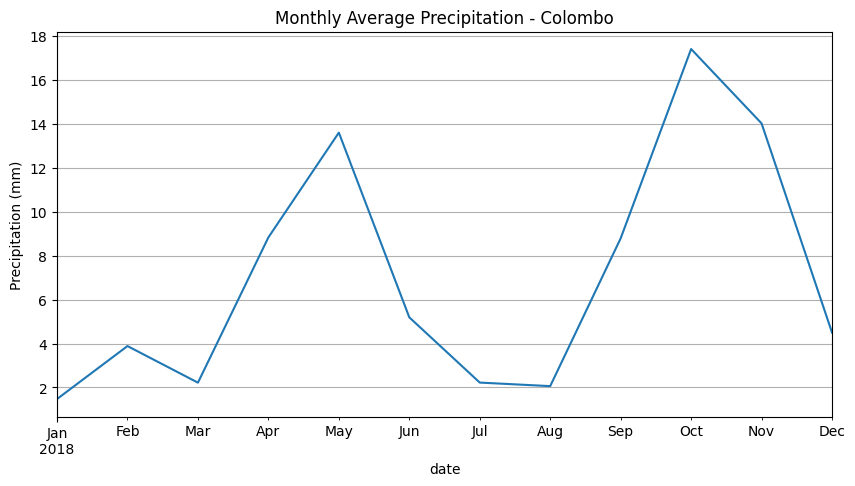

In [10]:
# 7. Plot original time series
ts.plot(title='Monthly Average Precipitation - Colombo', ylabel='Precipitation (mm)', figsize=(10, 5))
plt.grid()
plt.show()


In [11]:
# 8. ADF Test for stationarity
adf_result = adfuller(ts.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: 0.6336163167053799
p-value: 0.988415561146054


In [12]:
# 9. Make stationary if needed
ts_diff = ts.diff().dropna()

ValueError: could not broadcast input array from shape (11,) into shape (21,)

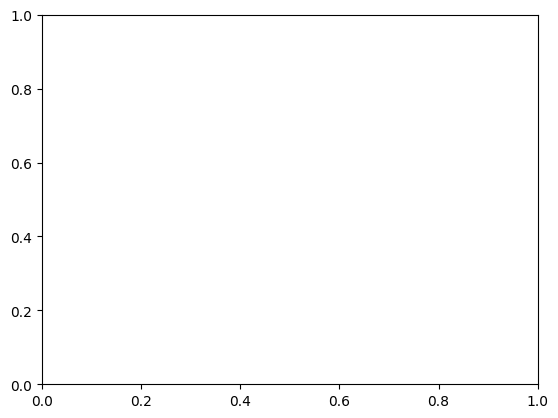

In [13]:
# 10. ACF & PACF Plots
plot_acf(ts_diff, lags=20)
plot_pacf(ts_diff, lags=20)
plt.show()

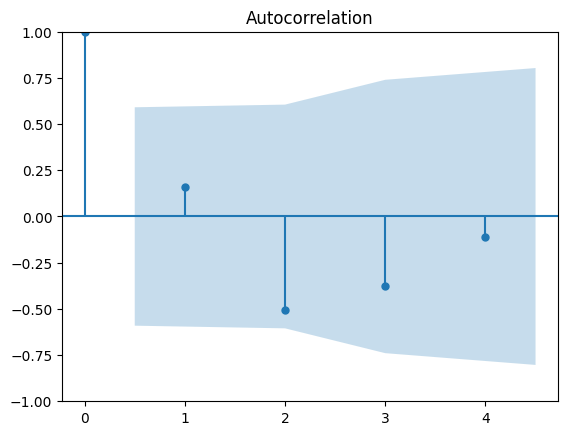

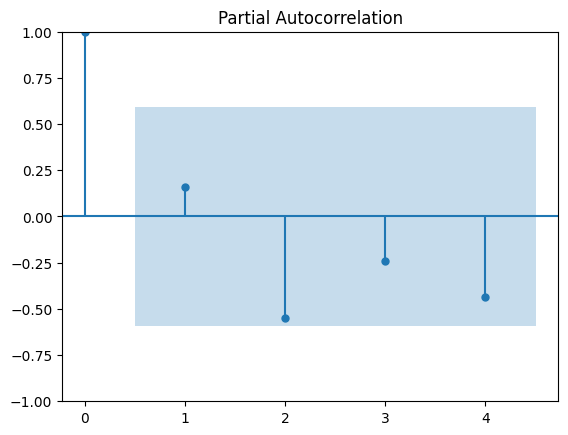

In [15]:
# Calculate maximum allowed lag (less than 50% of data size)
max_lags = min(10, (len(ts_diff) // 2) - 1)

# Now use ACF and PACF safely
plot_acf(ts_diff, lags=max_lags)
plot_pacf(ts_diff, lags=max_lags)
plt.show()

In [16]:
# 11. Fit ARIMA model (example: order=(1,1,1))
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

In [17]:
# 12. Model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             obs_val_mm   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -33.475
Date:                Sat, 10 May 2025   AIC                             72.950
Time:                        02:20:32   BIC                             74.144
Sample:                    01-31-2018   HQIC                            72.197
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2774      0.570     -0.486      0.627      -1.395       0.841
ma.L1          0.9992     95.659      0.010      0.992    -186.489     188.488
sigma2        21.5298   2048.402      0.011      0.9

In [18]:
# 13. Forecast
forecast = model_fit.forecast(steps=12)
print("Forecast for next 12 months:")
print(forecast)

Forecast for next 12 months:
2019-01-31    0.679639
2019-02-28    1.739285
2019-03-31    1.445373
2019-04-30    1.526895
2019-05-31    1.504284
2019-06-30    1.510555
2019-07-31    1.508816
2019-08-31    1.509298
2019-09-30    1.509164
2019-10-31    1.509202
2019-11-30    1.509191
2019-12-31    1.509194
Freq: ME, Name: predicted_mean, dtype: float64


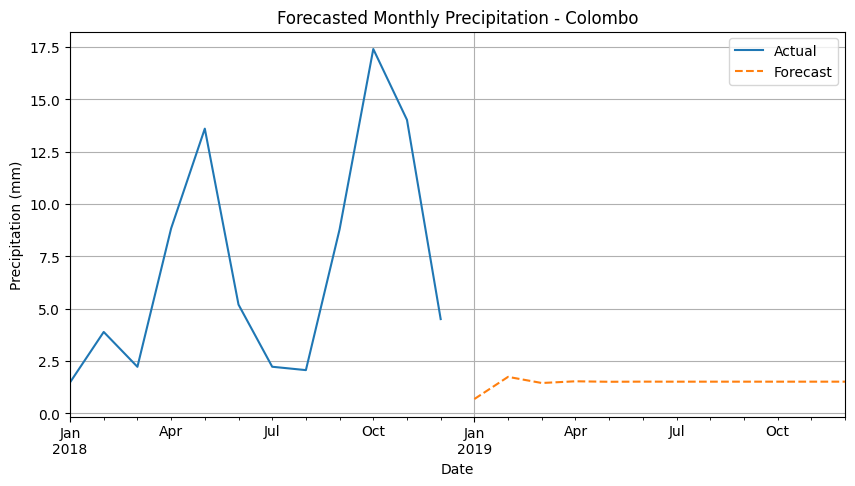

In [19]:
# 14. Plot actual vs forecast
ts.plot(label='Actual', figsize=(10, 5))
forecast.plot(label='Forecast', style='--')
plt.title('Forecasted Monthly Precipitation - Colombo')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid()
plt.show()